In [10]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

In [11]:
# python image library of range [0, 1] 
# transform them to tensors of normalized range[-1, 1]

transform = transforms.Compose( # composing several transforms together
    [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean = 0.5, std = 0.5

# set batch_size
batch_size = 4

# set number of workers
num_workers = 2

# load train data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

# load test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

# put 10 classes into a set
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


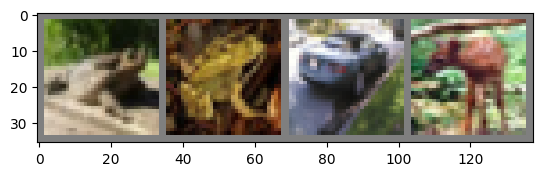

frog frog car deer


In [12]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images with iter function
dataiter = iter(trainloader)
images, labels = dataiter.next()

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [14]:
''' Models a simple Convolutional Neural Network'''
class Net(nn.Module):
    ''' initialize the network '''
    def __init__(self):
        super(Net, self).__init__()
        
        # 3 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)# 5x5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    ''' the forward propagation algorithm '''
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
#start = torch.cuda.Event(enable_timing=True)
#end = torch.cuda.Event(enable_timing=True)

#start.record()

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #print("iteration : ",i)
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# whatever you are timing goes here
#end.record()

# Waits for everything to finish running
#torch.cuda.synchronize()

print('Finished Training')
#print(start.elapsed_time(end))  # milliseconds

[1,  2000] loss: 0.860
[1,  4000] loss: 0.878
[1,  6000] loss: 0.920
[1,  8000] loss: 0.903
[1, 10000] loss: 0.914
[1, 12000] loss: 0.930
[2,  2000] loss: 0.833
[2,  4000] loss: 0.860
[2,  6000] loss: 0.867
[2,  8000] loss: 0.873
[2, 10000] loss: 0.884
[2, 12000] loss: 0.908
[3,  2000] loss: 0.776
[3,  4000] loss: 0.831
[3,  6000] loss: 0.834
[3,  8000] loss: 0.882
[3, 10000] loss: 0.865
[3, 12000] loss: 0.861
[4,  2000] loss: 0.763
[4,  4000] loss: 0.815
[4,  6000] loss: 0.817
[4,  8000] loss: 0.822
[4, 10000] loss: 0.800
[4, 12000] loss: 0.854
[5,  2000] loss: 0.728
[5,  4000] loss: 0.798
[5,  6000] loss: 0.773
[5,  8000] loss: 0.794
[5, 10000] loss: 0.822
[5, 12000] loss: 0.841
Finished Training


In [37]:
# save
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
# reload
#net = Net()
#net.load_state_dict(torch.load(PATH))

In [29]:
dataiter = iter(testloader)


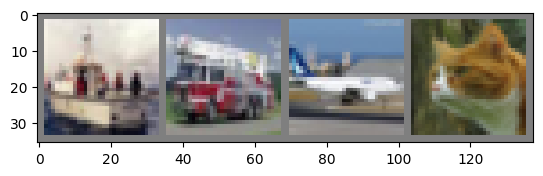

GroundTruth:  ship truck plane cat
Predicted:  ship truck plane cat


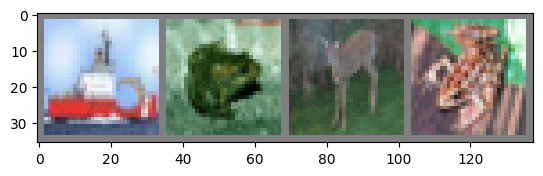

GroundTruth:  ship frog deer frog
Predicted:  ship frog deer dog


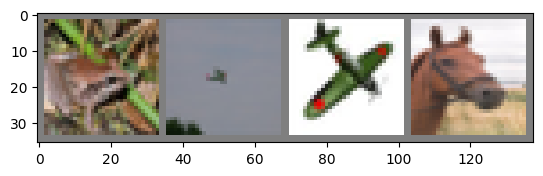

GroundTruth:  frog plane plane horse
Predicted:  frog plane plane dog


In [45]:
for i in range(3):
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))
    
    
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%s' % classes[predicted[j]] for j in range(4)))

In [42]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


2 epochs -> %52
+5 epochs -> %60
+5 epochs -> %61